<a href="https://colab.research.google.com/github/ruttdesai/Twitter-Sentiment-Analysis/blob/main/Twitter_Sentiment_Analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TWITTER SENTIMENT ANALYSIS**
- THE CLASSIFICATION OF THE TWEETS IS DONE INTO POSITIVE AND NEGATIVE SENTIMENTS
  - *MADE BY RUTT DESAI*

### **STEPS**
  1. Installing the Required Libraries.
  2. Importing the Datasets.
  3. Analyzing and Visualing the Data.
  4. Preprocessing the Data.
  5. TF-IDF in Scikit-Learn.
  6. Splitting the Data.
  7. Model Training.
  8. Evaluation.


In [128]:
#                        1.    Installing the Required Libraries.
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt

In [129]:
#                        2.    Importing the Datasets.
data_source_url = "https://raw.githubusercontent.com/ruttdesai/datasets/main/Tweets.csv"
tweets = pd.read_csv(data_source_url)
tweets.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [130]:
#                        3.    Analyzing and Visualing the Data.
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

8.0
6.0


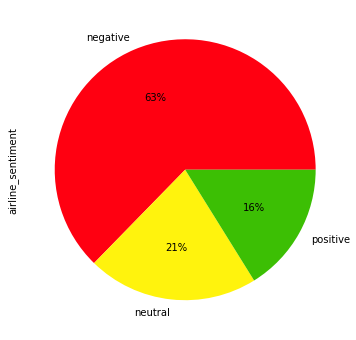

In [131]:
tweets.airline_sentiment.value_counts().plot(kind='pie',autopct='%1.0f%%', colors=["#ff0011", "#fff30d", "#3cbf04"])

In [132]:
#                        4.    Preprocessing the Data.
features = tweets.iloc[:, 10].values
labels = tweets.iloc[:, 1].values

In [141]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [134]:
nltk.download('stopwords') # Downloading the stopwords.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [135]:
#                        5.    TF-IDF in Scikit-Learn.
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [136]:
#                        6.    Splitting the Data.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [137]:
#                        7.    Model Training.
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, random_state=0)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [138]:
predictions = model.predict(x_test) # Making the Predictions

In [139]:
#                        8. Model Training.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1723  108   39]
 [ 326  248   40]
 [ 132   58  254]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928

0.7599043715846995


In [ ]:
# While making the Pipeline, I am getting the error " AttributeError: 'numpy.ndarray' object has no attribute 'lower' in pipeline ".
#   I tried solving the error for 3 days straight but I couldn't. Please Consider this since I am not from the computer background and 
#   all this stuff is new for me.